# 实验演示  


* 实验结果演示
* 实验过程演示

## 结果演示：使用预先得到的标记样本数据进行训练和预测


### 将标记过的样本集合划分为训练集和测试集

得到5个划分结果

In [2]:
from dataset.split import split

for i in range(5):
    print i,
    split("dataset/zzuf.dataset", i)

0 ('data size', 704) ('train size', 530) ('test size', 174)
1 ('data size', 704) ('train size', 441) ('test size', 263)
2 ('data size', 704) ('train size', 450) ('test size', 254)
3 ('data size', 704) ('train size', 441) ('test size', 263)
4 ('data size', 704) ('train size', 569) ('test size', 135)


### 根据划分的数据集进行多次训练与测试

using 530 examples to train.
Transforming data and fitting model..
Done!
Saving model to ./dataset/data/0/zzuf.pklz
             precision    recall  f1-score   support

          0       0.66      0.96      0.78        85
          1       0.94      0.52      0.67        89

avg / total       0.80      0.74      0.72       174

Accuracy per class: 0.96 0.52
Average accuracy: 0.74
(array([ 85.,  89.]), array([ 82.,   3.,  46.,  43.]))


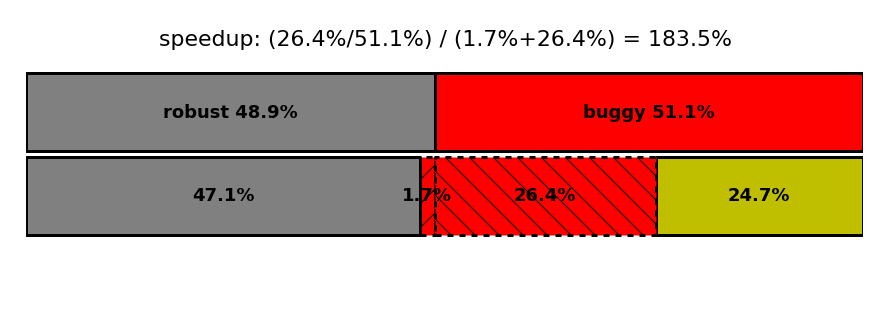

using 441 examples to train.
Transforming data and fitting model..
Done!
Saving model to ./dataset/data/1/zzuf.pklz
             precision    recall  f1-score   support

          0       0.38      0.92      0.54        87
          1       0.87      0.27      0.42       176

avg / total       0.71      0.49      0.46       263

Accuracy per class: 0.92 0.27
Average accuracy: 0.6
(array([  87.,  176.]), array([  80.,    7.,   48.,  128.]))


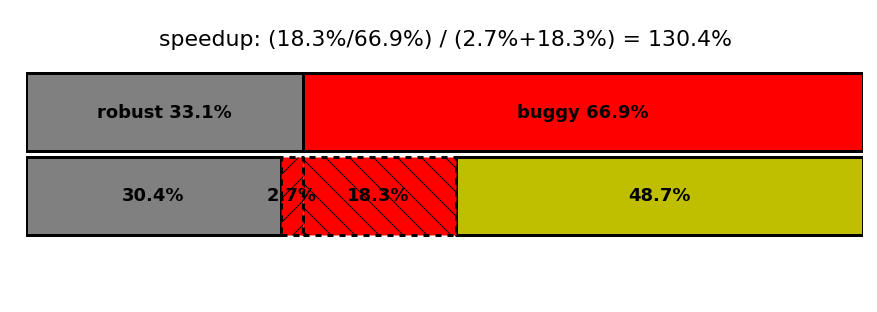

using 450 examples to train.
Transforming data and fitting model..
Done!
Saving model to ./dataset/data/2/zzuf.pklz
             precision    recall  f1-score   support

          0       0.46      0.87      0.60        83
          1       0.89      0.51      0.65       171

avg / total       0.75      0.63      0.63       254

Accuracy per class: 0.87 0.51
Average accuracy: 0.69
(array([  83.,  171.]), array([ 72.,  11.,  87.,  84.]))


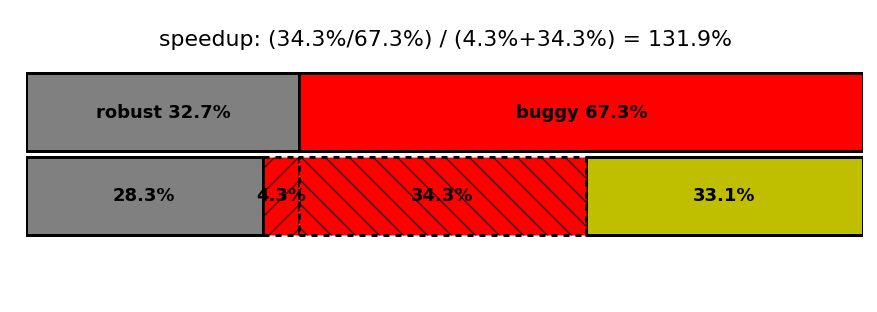

using 441 examples to train.
Transforming data and fitting model..
Done!
Saving model to ./dataset/data/3/zzuf.pklz
             precision    recall  f1-score   support

          0       0.45      0.80      0.57        93
          1       0.81      0.46      0.59       170

avg / total       0.68      0.58      0.58       263

Accuracy per class: 0.8 0.46
Average accuracy: 0.63
(array([  93.,  170.]), array([ 74.,  19.,  79.,  91.]))


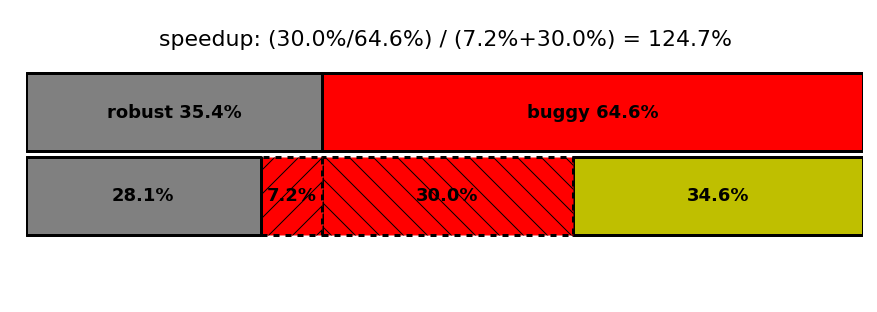

using 569 examples to train.
Transforming data and fitting model..
Done!
Saving model to ./dataset/data/4/zzuf.pklz
             precision    recall  f1-score   support

          0       0.47      0.93      0.63        61
          1       0.71      0.14      0.23        74

avg / total       0.60      0.50      0.41       135

Accuracy per class: 0.93 0.14
Average accuracy: 0.53
(array([ 61.,  74.]), array([ 57.,   4.,  10.,  64.]))


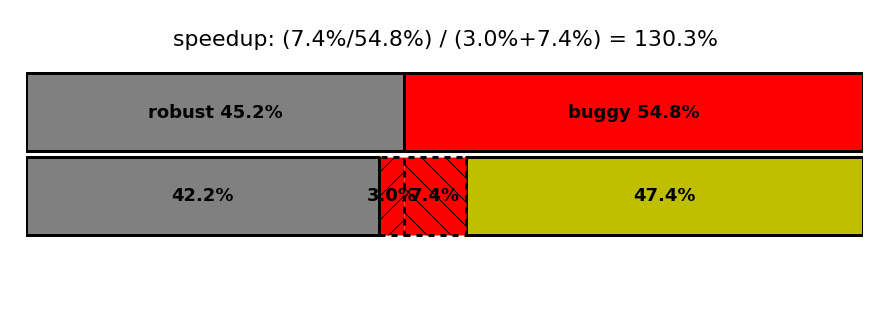

In [3]:
%matplotlib inline
from discover.Train import Train
from discover.Recall import Recall
import matplotlib.pyplot as plt
from dataset.Analyze import Analyze

for i in range(5):
    data_dir = "./dataset/data/" + str(i) + "/"
    Train(data_dir+"zzuf.pklz", data_dir+"train.csv", None, "rf", "bow", "dynamic", None)
    Recall(data_dir+"zzuf.pklz", data_dir+"test.csv", "dynamic", data_dir+"pred.csv", "simple")

    Analyze(data_dir+"test.csv", data_dir+"pred.csv")
    plt.show()

## 实验过程演示

* 获取元数据，包括大量格式的输入文件信息和接受文件输入的可执行程序以及参数
* 使用模糊测试对元数据进行正负标记，需要耗费大量的时间
* 从元数据中提取进行预测分类所需要的特征，得到测试数据集
* 使用测试数据集进行交叉验证，或者使用数据集训练得到预测模型，对未知元数据进行预测

### 获取元数据

In [6]:
# https://files.fuzzing-project.org
!tree seeds

seeds
├── animation
│   └── flic.fli
├── archives
│   ├── 7zip.7z
│   ├── ar.a
│   ├── arc.arc
│   ├── arj.arj
│   ├── bzip2.bz2
│   ├── compress.Z
│   ├── cpio.cpio
│   ├── gzip.gz
│   ├── lha.lzh
│   ├── lzip.lz
│   ├── lzop.lzo
│   ├── mar.mar
│   ├── mscab.cab
│   ├── mscompress.txt_
│   ├── rar2.rar
│   ├── rar30.rar
│   ├── rar5.rar
│   ├── shellarchive.shar
│   ├── tar-bzip2.tar.bz2
│   ├── tar-classic.tar
│   ├── tar-compress.tar.Z
│   ├── tar-gzip.tar.gz
│   ├── tar-lzip.tar.lzip
│   ├── tar-lzma.tar.lzma
│   ├── tar-lzop.tar.lzo
│   ├── tar-posix.tar
│   ├── tar-xz.tar.xz
│   ├── xar.xar
│   ├── xz.xz
│   └── zip.zip
├── audio
│   ├── amrnb.amr
│   ├── mp3.mp3
│   ├── musepack.mpc
│   ├── tracker
│   │   ├── abc.abc
│   │   ├── fasttracker2.xm
│   │   ├── impulsetracker.it
│   │   └── screamtracker.s3m
│   ├── vorbis.ogg
│   └── wav.wav
├── crypto
│   ├── discencryption
│   │   ├── luks.img
│   │   └── truecrypt.tc
│   ├── dnssec
│   │   ├── dnssec-ecdsa-private.dnssec
│   │ 

In [1]:
# change to kernel 3

from manfuzzer.manfuzzer import generate_testcases
from manfuzzer.manfuzzer import opened_files
from manfuzzer.values.seedgen import SeedGenerator
from manfuzzer.values.datagen import Int32ValueGenerator
from manfuzzer import manparser

executable = "/usr/bin/md5sum"
seeddir = "./seeds"
testcases = 10
argumentgenerator = manparser.mineflags(executable)

#print("The mined flags: %s" % str(argumentgenerator))

intgens = Int32ValueGenerator()
seedgens = SeedGenerator(seeddir)
generator = lambda : generate_testcases(argumentgenerator, intgens, seedgens, testcases = 10, seeddir=seeddir)

collection = []
for test_case in generator():
    cmd = executable + ' ' + test_case
    if opened_files(cmd):
        collection.append(cmd)
        print(cmd)
        #for seed in seedgens.get_all():
        #    print(cmd.replace("<seed>",seed))
    if len(collection) == testcases:
      break

#cmd = collection[0]
#for seed in seedgens.get_all():
#    print(cmd.replace("<seed>",seed))

/usr/bin/md5sum --tag <seed>
/usr/bin/md5sum -t <seed>
/usr/bin/md5sum  <seed>
/usr/bin/md5sum --check <seed>
/usr/bin/md5sum -w -c <seed>
/usr/bin/md5sum --binary <seed>
/usr/bin/md5sum -c --strict <seed>
/usr/bin/md5sum --check --status <seed>
/usr/bin/md5sum --check -c --strict <seed>
/usr/bin/md5sum --warn --check <seed>


### 从元数据中提取特征

In [1]:
# change to kernel 2

from discover.Fextractor import Extract
Extract("./testcases/wc/",True,1,10)

['./testcases/wc/:/usr/bin/wc', 'strrchr:0=SPtr32 strrchr:1=Num32B8 setlocale:0=Num32B8 setlocale:1=GxPtr32 bindtextdomain:0=GxPtr32 bindtextdomain:1=GxPtr32 textdomain:0=GxPtr32 setvbuf:0=Ptr32 setvbuf:1=NPtr32 setvbuf:2=Num32B8 setvbuf:3=Num32B0 getopt_long:0=Num32B8 getopt_long:1=SPtr32 getopt_long:2=GxPtr32 getopt_long:3=GxPtr32 getopt_long:4=NPtr32 getopt_long:0=Num32B8 getopt_long:1=SPtr32 getopt_long:2=GxPtr32 getopt_long:3=GxPtr32 getopt_long:4=NPtr32 malloc:0=Num32B8 malloc:0=Num32B8 open64:0=SPtr32 open64:1=Num32B0 open64:2=Top32 read:0=Num32B8 read:1=SPtr32 read:2=Num32B16 memchr:0=SPtr32 memchr:1=Num32B8 memchr:2=Num32B8 memchr:0=SPtr32 memchr:1=Num32B8 memchr:2=Num32B8 memchr:0=SPtr32 memchr:1=Num32B8 memchr:2=Num32B8 memchr:0=SPtr32 memchr:1=Num32B8 memchr:2=Num32B8 memchr:0=SPtr32 memchr:1=Num32B8 memchr:2=Num32B0 read:0=Num32B8 read:1=SPtr32 read:2=Num32B16 close:0=Num32B8 free:0=HPtr32 free:0=HPtr32 exit:0=Num32B0 fileno:0=Ptr32 fflush:0=Ptr32 fclose:0=Ptr32 fileno:0=P